In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
#Define df as our Dataset and set date as our index for the Dataset
df = pd.read_csv("data_clean_with_dummies.csv")
df = df.set_index('date')

#Define X and y, with X holding the Features and y the correspoding Count of pedestrians
#Features with PCA k=0.999 (PC1 - PC48)
X = df[df.columns[55:103]]

# The targetvariable we try to predict is the pedestrian count
y = df["pedestrians count"]

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets as numpy arryas (for our Neural Network)
Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.3, random_state=72)


from sklearn.preprocessing import StandardScaler
#Normalize the Data
# Scale the inputs to standardize the values of the Features
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.fit_transform(Xtest)


In [6]:
#Import Keras and layers to create a Neural Network with multiple layers
from tensorflow import keras
from tensorflow.keras import layers

In [7]:
#Define Neural Network model

#Create a Keras Sequential class to hold the different layers of our Neural Network
model = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a output layer with 1 Neuron because we only have one output --> predicted pedestrian count

model.summary()#Display an overview of the Model


Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4900      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 25)                650       
                                              

2022-11-24 12:03:09.719821: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-24 12:03:09.720096: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
#Specify the training configuration for the Neural Network
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),  # Optimizer that minimizes our loss function (f.e SGD or Adam) with a learning rate of 0.001
    loss=keras.losses.mae,  # Loss function to minimize --> Mean absolute error 
    metrics=["mae", "mse"], # List of metrics to monitor
)

#Mehrere callbacks einfügen mit learning rate von keras callbacks --> webseite

history = model.fit(
    Xtrain, # Fit the model on the train data 
    ytrain, #Fit the model on the train data 
    #batch_size=64,
    epochs=100, # 1 epoch is one training iteration - for each epoch the Neural Network processes the entire training data 
    callbacks = tf.keras.callbacks.EarlyStopping(monitor="val_mae", patience=10), #Stop training when training is no longer improving Mean absolute error of the validation data (20% of the training data) within 3 epochs (metrics)
    validation_split=0.2, #Reserve 20% of the training data for validation at the end of each epoch 
)

Epoch 1/100


2022-11-24 12:03:13.833201: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-24 12:03:14.215779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1536.2180 - mae: 1536.2180 - mse: 7407269.5000

2022-11-24 12:03:17.762519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 4s 13ms/step - loss: 1536.2180 - mae: 1536.2180 - mse: 7407269.5000 - val_loss: 672.5425 - val_mae: 672.5425 - val_mse: 1479218.0000
Epoch 2/100
269/269 [==============================] - 3s 11ms/step - loss: 618.8828 - mae: 618.8828 - mse: 1394861.8750 - val_loss: 532.0747 - val_mae: 532.0747 - val_mse: 1081858.1250
Epoch 3/100
269/269 [==============================] - 3s 10ms/step - loss: 490.1678 - mae: 490.1678 - mse: 1015802.4375 - val_loss: 459.3765 - val_mae: 459.3765 - val_mse: 915695.3125
Epoch 4/100
269/269 [==============================] - 3s 11ms/step - loss: 426.0647 - mae: 426.0647 - mse: 868886.3750 - val_loss: 430.0017 - val_mae: 430.0017 - val_mse: 814838.9375
Epoch 5/100
269/269 [==============================] - 3s 11ms/step - loss: 401.4591 - mae: 401.4591 - mse: 804769.2500 - val_loss: 404.4649 - val_mae: 404.4649 - val_mse: 796631.3125
Epoch 6/100
269/269 [==============================] - 3s 11ms/step - loss: 381.9618 

In [9]:
from sklearn.metrics import r2_score
#import tensorflow_addons as tfa


pred_train = model.predict(Xtrain)
ypred = model.predict(Xtest)
print(f"R score is : {r2_score(ytest, ypred)}")


# mae = tf.keras.losses.MeanAbsoluteError()
# mae(ytest, ypred).numpy()
# print(f"MAE is : {tf.keras.losses.MeanAbsoluteError(ytest, ypred).numpy()}"

 35/336 [==>...........................] - ETA: 0s

2022-11-24 12:05:01.232011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


144/144 [==============================] - 0s 3ms/step
R score is : 0.951923996718119


In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

print(f"MSE: {np.sqrt(mean_squared_error(ytest, ypred))}")

print(f"MAE: {np.sqrt(mean_absolute_error(ytest,ypred))}")

MSE: 715.0622626014242
MAE: 17.940872623736627


In [11]:
# Evaluate the model on the test data using `evaluate` result is the corresponding MAE
print("Evaluate on test data")
results = model.evaluate(Xtest, ytest)
results_train = model.evaluate(Xtrain, ytrain)
print("test loss, test acc:", results)
print("train loss, train acc:", results_train)
results


######NUR ZUM ÜBERPRÜFUEN!!!!!!!!!!
# test loss, test acc: [343.4073791503906, 343.4073791503906]
# train loss, train acc: [321.52264404296875, 321.52264404296875]


Evaluate on test data
336/336 [==============================] - 2s 6ms/step - loss: 285.3806 - mae: 285.3806 - mse: 535080.1250
test loss, test acc: [321.8749694824219, 321.8749694824219, 511314.0]
train loss, train acc: [285.38055419921875, 285.38055419921875, 535080.125]


[321.8749694824219, 321.8749694824219, 511314.0]

144/144 [==============================] - 1s 4ms/step


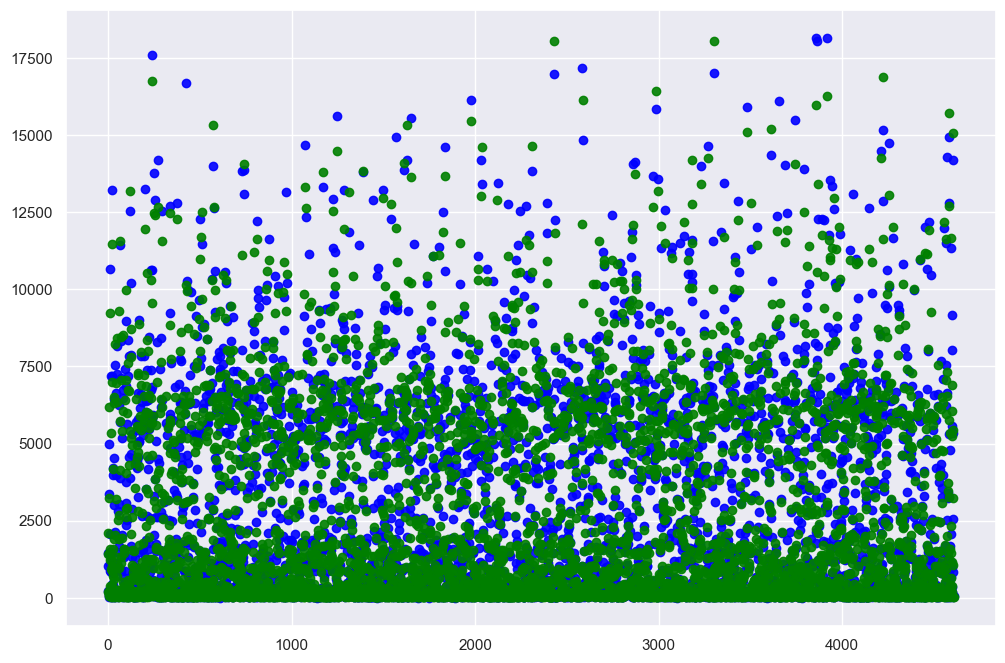

In [12]:
#Visualize the results predictions vs actual values
#Create a sequenze from 0 to the row lenght of the test data in order to plot
xs = np.linspace(0, ytest.shape[0], num=ytest.shape[0])

fig, ax = plt.subplots(figsize=(12, 8))

#Using the Neural Network to predict the Pedestrian count for our Xtest set in order to plot it against the actual values
ypred = model.predict(Xtest)

plt.scatter(xs, ytest, color ='blue', alpha=0.9)

plt.scatter(xs, ypred, color ='green', alpha=0.9)

plt.show()

144/144 [==============================] - 1s 6ms/step - loss: 321.8750 - mae: 321.8750 - mse: 511314.0000


([<matplotlib.axis.XTick at 0x2d1378940>,
 [Text(0, 0, 'Training Data'),
  Text(1, 0, 'Validation Data'),
  Text(2, 0, 'Test Data')])

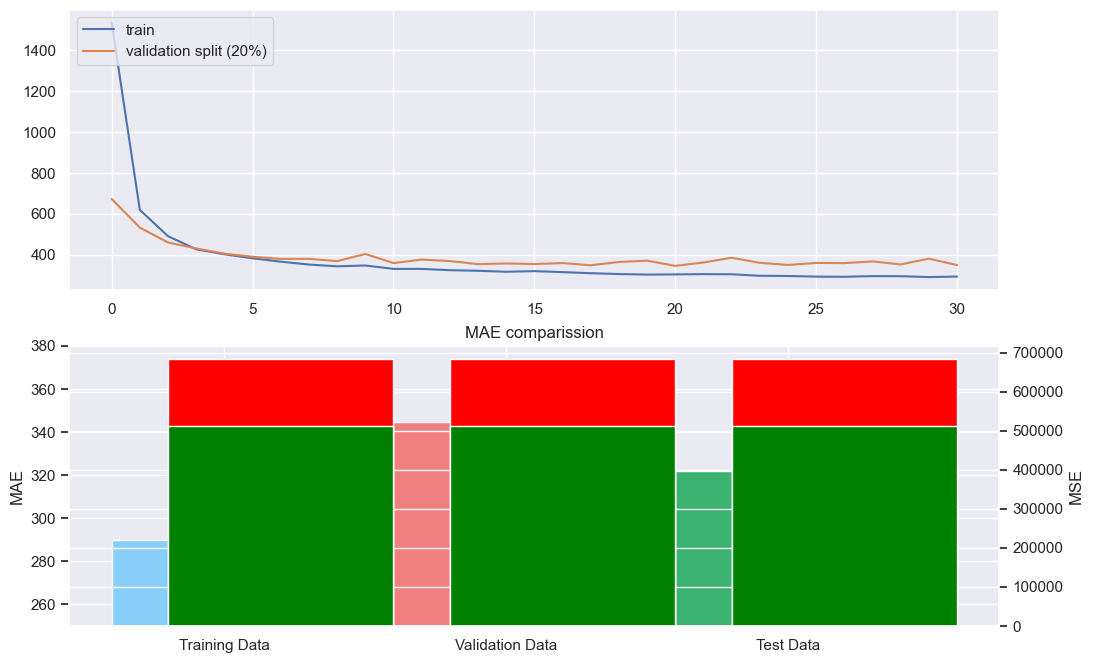

In [83]:
#Plot the MAE on the training data against the validation split of the Training data over time 
#history.history.keys()

fig, axs = plt.subplots(2, figsize=(12, 8))

axs[0].plot(history.history['mae'])
axs[0].plot(history.history['val_mae'])
#axs[0].title('model MAE')
# axs[0].ylabel('MAE')
# axs[0].xlabel('epoch')
axs[0].legend(['train', 'validation split (20%)'], loc='upper left')


# axs[1].plot(history.history['loss'])
# axs[1].plot(history.history['val_loss'])
# # axs[1].title('Model loss')
# # axs[1].ylabel('loss')
# #axs[1].xlabel('epoch')
# axs[1].legend(['train', 'test'], loc='upper left')

axs4 = axs[1].twinx()
x_axis = np.arange(3)

nameofdata = ["Training Data","Validation Data","Test Data"]

f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

axs[1].bar("Training Data",min(f_mae), color="lightskyblue") #Display minimum mae of the training data set
axs[1].bar("Validation Data", min(f_val_mae), color="lightcoral")#Display minimum mae of the validation data set
axs[1].bar("Test Data", f_test_mae[0], color="mediumseagreen")#Display mae of the test data set
axs[1].bar_label(axs[1].containers[0], label_type='edge')
axs[1].bar_label(axs[1].containers[1], label_type='edge')
axs[1].bar_label(axs[1].containers[2], label_type='edge')
axs[1].set_ylim([250, 380])
axs[1].set_title('MAE comparission')
axs[1].set_ylabel('MAE')

axs4.bar(x_axis +0.2, min(f_mse), color="black")
axs4.bar(x_axis+0.2,min(f_val_mse), color="red")
axs4.bar(x_axis+0.2, f_test_mae[2], color="green")
axs4.set_ylabel('MSE')


plt.xticks(x_axis,nameofdata)



In [7]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

red_patch = mpatches.Patch(color='red', label='The red data')
plt.legend(handles=[red_patch])

[<matplotlib.patches.Patch object at 0x106f9f970>, <matplotlib.patches.Patch object at 0x106f9ed70>, <matplotlib.patches.Patch object at 0x106f9df00>]


144/144 [==============================] - 1s 6ms/step - loss: 321.8750 - mae: 321.8750 - mse: 511314.0000


([<matplotlib.axis.XTick at 0x2d0e7a920>,
 [Text(0, 0, 'Training Data'),
  Text(1, 0, 'Validation Data'),
  Text(2, 0, 'Test Data')])

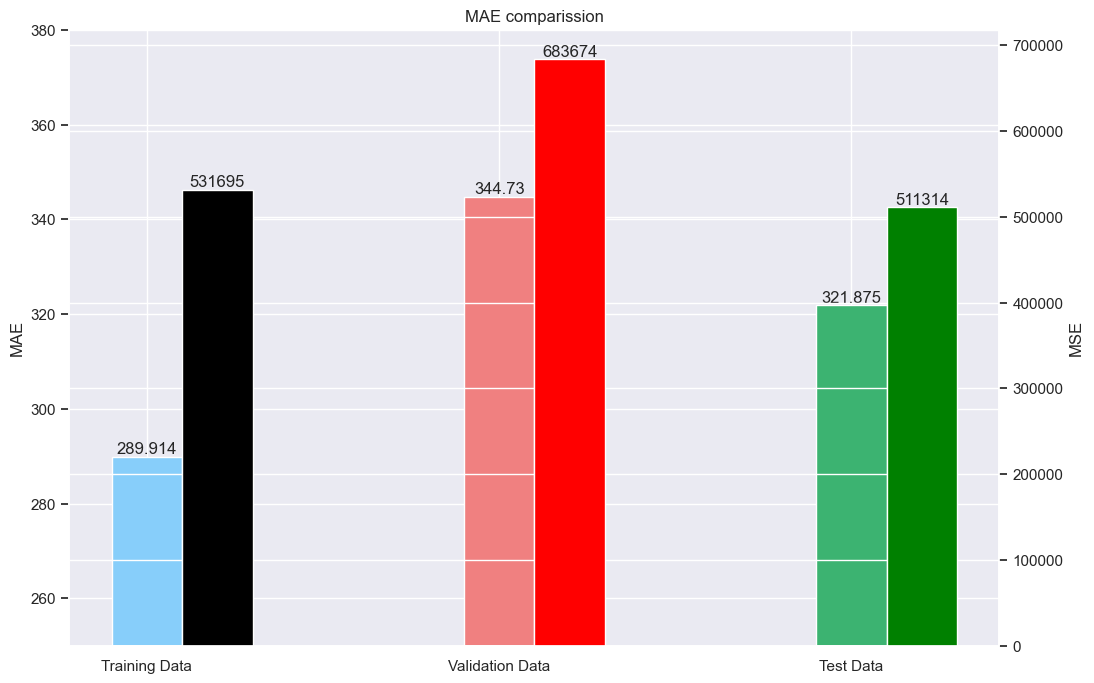

In [109]:

fig, axs = plt.subplots(figsize=(12, 8))
axs4 = axs.twinx()
x_axis = np.arange(3)

nameofdata = ["Training Data","Validation Data","Test Data"]

f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

axs.bar(x_axis[0],min(f_mae), color="lightskyblue", width=0.2) #Display minimum mae of the training data set
axs.bar(x_axis[1], min(f_val_mae), color="lightcoral", width=0.2)#Display minimum mae of the validation data set
axs.bar(x_axis[2], f_test_mae[0], color="mediumseagreen", width=0.2)#Display mae of the test data set
axs.bar_label(axs.containers[0], label_type='edge')
axs.bar_label(axs.containers[1], label_type='edge')
axs.bar_label(axs.containers[2], label_type='edge')
axs.set_ylim([250, 380])
axs.set_title('MAE comparission')
axs.set_ylabel('MAE')

axs4.bar(x_axis[0] +0.2, min(f_mse), color="black", width=0.2)
axs4.bar(x_axis[1]+0.2, min(f_val_mse), color="red", width=0.2)
axs4.bar(x_axis[2]+0.2, f_test_mae[2], color="green", width=0.2)
axs4.set_ylabel('MSE')

axs4.bar_label(axs4.containers[0], label_type='edge')
axs4.bar_label(axs4.containers[1], label_type='edge')
axs4.bar_label(axs4.containers[2], label_type='edge')


plt.xticks(x_axis,nameofdata)

531695.4375

In [2]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('odel loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: name 'plt' is not defined

In [1]:
#Compare the MAE of the training data and the validation split with the MAE on the test data
# summarize history for loss
f_mae = history.history["mae"]
f_val_mae = history.history["val_mae"]
f_test_mae = model.evaluate(Xtest, ytest)

fig, ax = plt.subplots(figsize=(12, 8))
plt.bar("Training Data",f_mae[-1])
plt.bar("Validation Data", f_val_mae[-1])
plt.bar("Test Data", f_test_mae[-1])
plt.title('MAE comparission')
plt.ylabel('MAE')
plt.show()

NameError: name 'history' is not defined

### Hyperparameter tuning

In [15]:
def evaluate_model(model, Xtest, ytest):
    """
    evaluate model on test set and show results in dataframe.
    
    Parameters
    ----------
    model : keras model
        trained keras model.
    X_test : numpy array
        Features of holdout set.
    y_test : numpy array
        Labels of holdout set.
        
    Returns
    -------
    display_df : DataFrame
        Pandas dataframe containing evaluation results.
    """
    eval_dict = model.evaluate(Xtest, ytest, return_dict=True)
    
    display_df = pd.DataFrame([eval_dict.values()], columns=[list(eval_dict.keys())])
    
    return display_df

# Evaluate model on test set and add results to dataframe
results = evaluate_model(model, Xtest, ytest)

# Set index to 'Baseline'
results.index = ['Startwerte']

# Display results
results.head()

144/144 [==============================] - 1s 6ms/step - loss: 321.8750 - mae: 321.8750 - mse: 511314.0000


,loss,mae,mse
Startwerte,321.874969,321.874969,511314.0


In [258]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
layers.Dense(
            # Define the hyperparameter.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            activation="relu",
        )
    )
    model.add(layers.Dense(10, activation="relu"))
    model.compile(
        optimizer="adam", loss="mae", metrics=["accuracy"],
    )
    return model



    odel = keras.Sequential()

model.add(keras.Input(shape=X.shape[1])) #Add a Input layer and define the Input shape of it (which is the column lenght of the feature Dataset X)
model.add(layers.Dense(100, activation="relu")) #Add a Hidden layer with 500 Neurones with Dense. Dense takes the output from our Input layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a second Hidden layer with 250 Neurones with Dense. Dense takes the output from our first hidden layer applies a weight matrix and than applies a activation function (in this case relu).
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(50, activation="relu")) #Add a third Hidden layer with 100 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(25, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(10, activation="relu")) #Add a fourth Hidden layer with 50 Neurones with Dense. 
model.add(layers.Dense(1, activation="relu")) # Add a

In [259]:
import keras_tuner

build_model(keras_tuner.HyperParameters())


In [266]:
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Flatten())
    model.add(
        layers.Dense(
            # Tune number of units.
            units=hp.Int("units", min_value=32, max_value=512, step=32),
            # Tune the activation function to use.
            activation=hp.Choice("activation", ["relu", "tanh"]),
        )
    )

    # Define the optimizer learning rate as a hyperparameter.
    learning_rate = hp.Float("lr", min_value=1e-4, max_value=1e-2, sampling="log")
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss="mae",
        metrics=["accuracy"],
    )
    return model


build_model(keras_tuner.HyperParameters())

In [290]:
# tuner = keras_tuner.Hyperband(
#     hypermodel=build_model,
#     objective="val_accuracy",
#     max_trials=3,
#     executions_per_trial=2,
#     overwrite=True,
#     directory="my_dir",
#     project_name="helloworld",
# )
# tuner.search_space_summary()


tuner = keras_tuner.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=20,
                     factor=10,
                     hyperband_iterations=10,
                     directory="kt_dir",
                     project_name="kt_hyperband",)

tuner.search_space_summary()

Search space summary
Default search space size: 3
units (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.01, 'step': None, 'sampling': 'log'}


In [278]:
tuner.search(Xtrain, ytrain, epochs=10, validation_split=0.2)


Search: Running Trial #51

Value             |Best Value So Far |Hyperparameter
512               |64                |units
tanh              |tanh              |activation
0.00099438        |0.00079402        |lr
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


2022-11-23 19:49:59.672248: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


  8/269 [..............................] - ETA: 15s - loss: 2904.2983 - accuracy: 0.0000e+00

KeyboardInterrupt: 

### Hyperparameter Tuning

In [14]:
# import keras_tuner as kt

# def model_builder(hp):
#   model = tf.keras.Sequential()
#   model.add(tf.keras.layers.Flatten())
#   # model.add(tf.keras.layers.Flatten(input_shape=(1, 48)))

#   hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
#   hp_layer_1 = hp.Int('layer_1', min_value=32, max_value=512, step=32)
#   hp_layer_2 = hp.Int('layer_2', min_value=32, max_value=512, step=32)
#   hp_layer_3 = hp.Int('layer_3', min_value=32, max_value=512, step=32) 
#   hp_layer_4 = hp.Int('layer_4', min_value=32, max_value=512, step=32)
#   hp_layer_5 = hp.Int('layer_5', min_value=32, max_value=512, step=32) 
#   hp_layer_6 = hp.Int('layer_6', min_value=32, max_value=512, step=32) 
#   hp_layer_7 = hp.Int('layer_7', min_value=32, max_value=512, step=32) 
#   hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

#   model.add(tf.keras.layers.Dense(units=hp_layer_1, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_2, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_3, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_4, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_5, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_6, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(units=hp_layer_7, activation=hp_activation))
#   model.add(tf.keras.layers.Dense(1, activation='relu'))

#   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                 loss=tf.keras.losses.mae,
#                 metrics=['mae'])
  
#   return model

import tensorflow as tf
import keras_tuner as kt
from tensorflow import keras

# def model_builder(hp):
 
#     # Initialize sequential API and start building model.
#     model = keras.Sequential()
#     model.add(keras.layers.Flatten())
    
#     # Tune the number of hidden layers and units in each.
#     # Number of hidden layers: 1 - 10
#     # Number of Units: 32 - 512 with stepsize of 32
#     for i in range(1, hp.Int("num_layers", 2, 15)):
#         model.add(
#             keras.layers.Dense(
#                 units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
#                 activation="relu")
#             )
        
      
#     # Add output layer.
#     model.add(keras.layers.Dense(units=1, activation="relu"))
    
#     # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
#     hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
#     # Define optimizer, loss, and metrics
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                   loss=keras.losses.mae,
#                   metrics=["mae"])
    
#     return model


def model_builder(hp): #ADAGRAD BENUTZEN ALS OPTIMZER und LEARNING RATE DECREASE implementieren
 
    # Initialize sequential API and start building model.
    model = keras.Sequential()
    model.add(keras.layers.Flatten())
    
    # Tune the number of hidden layers and units in each.
    # Number of hidden layers: 1 - 10
    # Number of Units: 32 - 512 with stepsize of 32
    for i in range(1, hp.Int("num_layers", 2, 11)):
        
        hp_activation = hp.Choice('activation', values=['relu', 'tanh'])
        
        model.add(
            keras.layers.Dense(
                units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
                activation=hp_activation)
            )
        
      
    # Add output layer.
    model.add(keras.layers.Dense(units=1, activation="relu"))
    
    # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
    
    # Define optimizer, loss, and metrics
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                  loss=keras.losses.mae,
                  metrics=["mae"])
    
    return model


In [15]:
import keras_tuner as kt

tuner = kt.Hyperband(model_builder,
                     objective='val_mae',
                     max_epochs=30,
                     factor=3,
                     hyperband_iterations=15,
                     overwrite=True,
                     directory='kt_dir2',
                     project_name='kt_hyperband2')

# tuner = keras_tuner.Hyperband(model_builder,
#                      objective="val_mae",
#                      max_epochs=10,
#                      factor=3,
#                      hyperband_iterations=10,
#                      directory="kt_dir",
#                      project_name="kt_hyperband",)


                     




In [16]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_mae', patience=3)

In [17]:
tuner.search(Xtrain, ytrain, epochs=50, validation_split=0.2, callbacks=[stop_early])

Trial 74 Complete [00h 21m 12s]
val_mae: 363.8334045410156

Best val_mae So Far: 350.7418212890625
Total elapsed time: 04h 23m 09s

Search: Running Trial #75

Value             |Best Value So Far |Hyperparameter
10                |5                 |num_layers
tanh              |relu              |activation
352               |448               |units_1
0.001             |0.001             |learning_rate
352               |128               |units_2
160               |320               |units_3
128               |320               |units_4
352               |384               |units_5
160               |160               |units_6
320               |352               |units_7
224               |448               |units_8
32                |160               |units_9
320               |160               |units_10
10                |30                |tuner/epochs
0                 |10                |tuner/initial_epoch
1                 |2                 |tuner/bracket
0               

2022-11-24 05:09:07.684070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


147/269 [===============>..............] - ETA: 13:57 - loss: 2578.7319 - mae: 2578.7319

155/269 [================>.............] - ETA: 12:25 - loss: 2572.6755 - mae: 2572.6755

: 

: 

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]


NameError: name 'tuner' is not defined

In [ ]:
h_model = tuner.hypermodel.build(best_hps)
history = h_model.fit(Xtrain, ytrain, epochs=50, validation_split=0.2,
                    callbacks=[stop_early])

                    

Epoch 1/50


2022-11-23 23:30:56.068445: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - ETA: 0s - loss: 1138.3671 - mae: 1138.3671

2022-11-23 23:31:00.819305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


269/269 [==============================] - 6s 18ms/step - loss: 1138.3671 - mae: 1138.3671 - val_loss: 582.6376 - val_mae: 582.6376
Epoch 2/50
269/269 [==============================] - 2s 9ms/step - loss: 492.8920 - mae: 492.8920 - val_loss: 416.7682 - val_mae: 416.7682
Epoch 3/50
269/269 [==============================] - 3s 10ms/step - loss: 419.3342 - mae: 419.3342 - val_loss: 387.8136 - val_mae: 387.8136
Epoch 4/50
269/269 [==============================] - 2s 9ms/step - loss: 382.2344 - mae: 382.2344 - val_loss: 380.4399 - val_mae: 380.4399
Epoch 5/50
269/269 [==============================] - 2s 9ms/step - loss: 366.8080 - mae: 366.8080 - val_loss: 391.1324 - val_mae: 391.1324
Epoch 6/50
269/269 [==============================] - 2s 9ms/step - loss: 350.3066 - mae: 350.3066 - val_loss: 437.2744 - val_mae: 437.2744
Epoch 7/50
269/269 [==============================] - 2s 9ms/step - loss: 347.7671 - mae: 347.7671 - val_loss: 364.1671 - val_mae: 364.1671
Epoch 8/50
269/269 [=======

In [ ]:
# Evaluate model on test set
hyper_df = evaluate_model(h_model, Xtest, ytest)

# Set index to hypertuned
hyper_df.index = ["Hypertuned"]

# Append results in dataframe
results.append(hyper_df)

144/144 [==============================] - 1s 7ms/step - loss: 326.6047 - mae: 326.6047


/var/folders/lj/x77cgrfn0ml3pv3407q8vw0c0000gn/T/ipykernel_1457/4293296147.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results.append(hyper_df)


,loss,mae,mse
Startwerte,320.964966,320.964966,504031.34375
Hypertuned,326.604736,326.604736,NaN


	loss	mae	mse
Startwerte	320.964966	320.964966	504031.34375
Hypertuned	326.604736	326.604736	NaN